<a href="https://colab.research.google.com/github/nuwanc/ml/blob/main/bb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

df = pd.read_csv('bakery_sales.csv',index_col='Date',parse_dates=True)
df.head()

,Item,Produced,Sold,Leftover,Holiday,Promotion
Date,,,,,,
2024-07-01,Bread,90,78,12,False,False
2024-07-01,Fish Bun,93,78,15,False,False
2024-07-01,Hotdog Bun,91,91,0,False,False
2024-07-01,Tea Bun,83,72,11,False,False
2024-07-02,Bread,107,96,11,True,True


In [4]:
df['Holiday'] = df['Holiday'].astype(int)
df['Promotion'] = df['Promotion'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2024-07-01 to 2024-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Item       248 non-null    object
 1   Produced   248 non-null    int64 
 2   Sold       248 non-null    int64 
 3   Leftover   248 non-null    int64 
 4   Holiday    248 non-null    int64 
 5   Promotion  248 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 13.6+ KB


In [6]:
df.tail()

,Item,Produced,Sold,Leftover,Holiday,Promotion
Date,,,,,,
2024-08-30,Tea Bun,113,112,1,0,0
2024-08-31,Bread,144,122,22,0,0
2024-08-31,Fish Bun,123,102,21,0,0
2024-08-31,Hotdog Bun,135,121,14,0,0
2024-08-31,Tea Bun,142,115,27,0,0


In [12]:
bread_df = df[df['Item']=='Bread']
bread_df.head()

,Item,Produced,Sold,Leftover,Holiday,Promotion
Date,,,,,,
2024-07-01,Bread,90,78,12,0,0
2024-07-02,Bread,107,96,11,1,1
2024-07-03,Bread,111,92,19,0,1
2024-07-04,Bread,81,70,11,0,0
2024-07-05,Bread,111,95,16,0,0


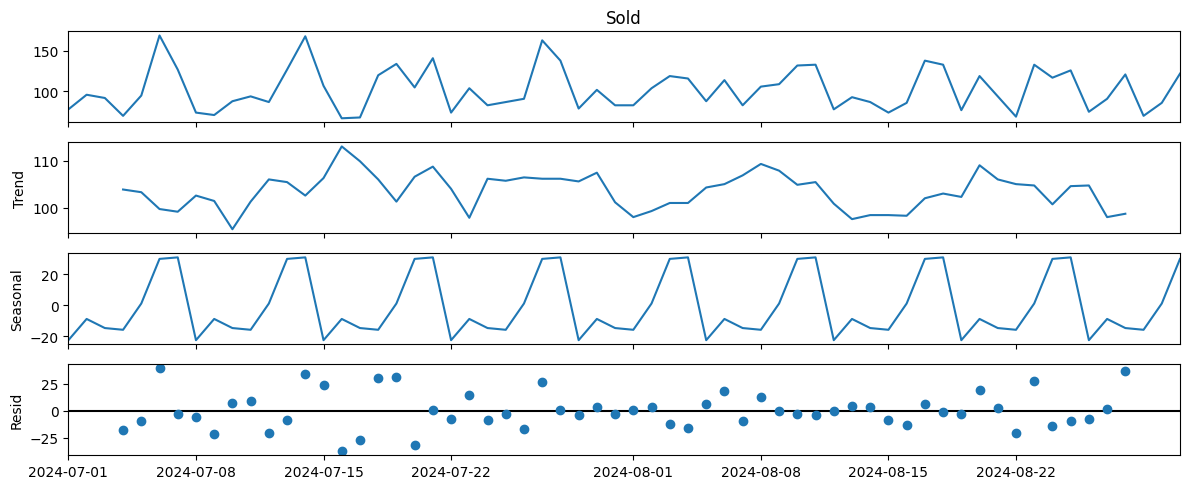

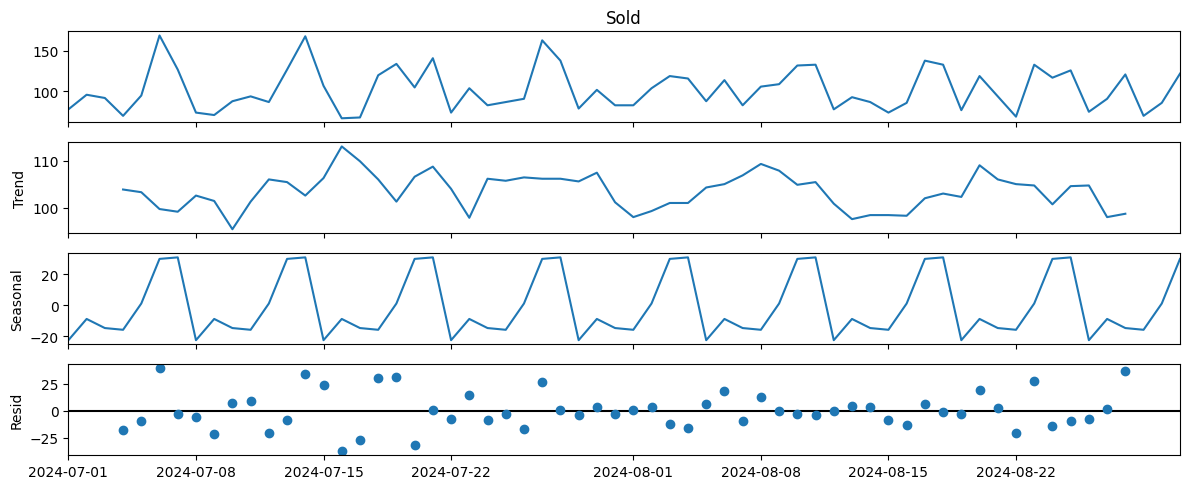

In [13]:
result = seasonal_decompose(bread_df['Sold'], period=7)
result.plot()

In [14]:
auto_arima(bread_df['Sold'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   62
Model:             SARIMAX(0, 0, 1)x(2, 0, [], 7)   Log Likelihood                -274.156
Date:                            Fri, 09 Aug 2024   AIC                            558.312
Time:                                    15:50:26   BIC                            568.948
Sample:                                07-01-2024   HQIC                           562.488
                                     - 08-31-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.2588      7.570      1.884      0.060      -0.578      29.096
ma.L1         -0.5543      0.134     -4.140      0.000      -0.817      -0.292
ar.S.L7        0.2839      0.111      2.554      0.011       0.066       0.502
ar.S.L14       0.5753      0.113      5.082      0.000       0.353       0.797
sigma2       295.0910     54.792      5.386      0.000     187.701     402.481
===================================================================================
Ljung-Box (L1) (Q):                   2.16   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.14   Prob(JB):                         0.09
Heteroskedasticity (H):               0.37   Skew:                             0.68
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""